In [1]:
import torch

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import torch.nn as nn

In [3]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"] = "TRUE"

In [4]:
url = 'https://gist.githubusercontent.com/noamross/e5d3e859aa0c794be10b/raw/b999fb4425b54c63cab088c0ce2c0d6ce961a563/cars.csv'
df = pd.read_csv(url)
df.head()

,Unnamed: 0,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Hornet Sportabout,18.7,8,360.0,175,3.15,3.440,17.02,0,0,3,2


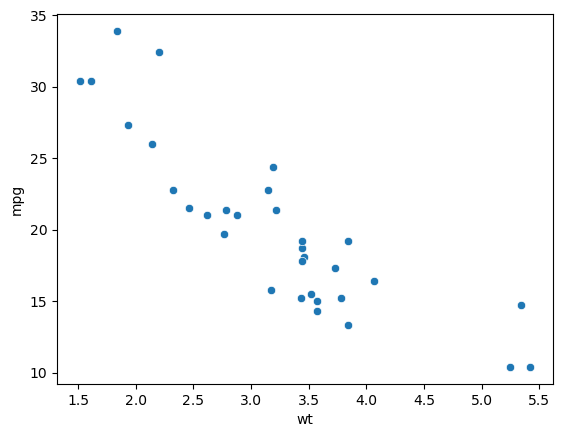

In [5]:
sns.scatterplot(x='wt',y='mpg',data=df);

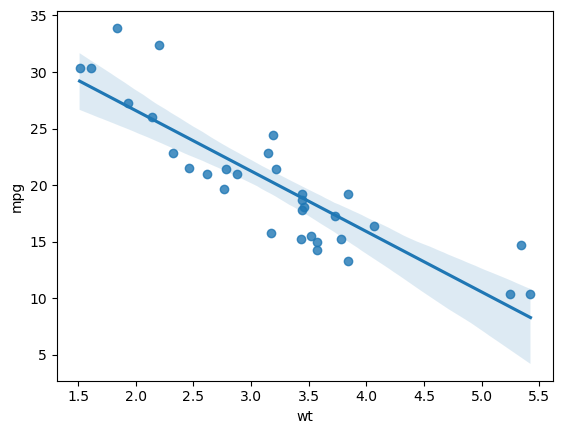

In [6]:
sns.regplot(x='wt',y='mpg',data=df);

In [7]:
# coverting the data into tensor
X_list = df.wt.values
X_np = np.array(X_list, dtype=np.float32).reshape(-1,1)
X = torch.from_numpy(X_np)

In [8]:
y_list = df.mpg.values.tolist()
y = torch.tensor(y_list)

In [9]:
w = torch.rand(1, requires_grad=True, dtype=torch.float32)
b = torch.rand(1, requires_grad=True, dtype=torch.float32)  

In [10]:
num_epochs = 1000
learning_rate = 0.001

for epoch in range(num_epochs):
    for i in range(len(X)):
        # forward pass
        y_pred = w*X[i] + b
        loss = torch.pow(y_pred-y[i],2)
        
        # backward pass
        loss.backward()

        # extracting loss
        loss_value = loss.data[0]

        # update the weights and bias 
        with torch.no_grad():
            w -= w.grad * learning_rate
            b -= b.grad * learning_rate
            w.grad.zero_()
            b.grad.zero_()

    print(loss_value)


tensor(154.3690)
tensor(80.5936)
tensor(54.7585)
tensor(44.4598)
tensor(39.9178)
tensor(37.7149)
tensor(36.5146)
tensor(35.7567)
tensor(35.1980)
tensor(34.7307)
tensor(34.3067)
tensor(33.9043)
tensor(33.5140)
tensor(33.1312)
tensor(32.7540)
tensor(32.3815)
tensor(32.0133)
tensor(31.6490)
tensor(31.2888)
tensor(30.9323)
tensor(30.5796)
tensor(30.2307)
tensor(29.8855)
tensor(29.5439)
tensor(29.2059)
tensor(28.8716)
tensor(28.5408)
tensor(28.2135)
tensor(27.8896)
tensor(27.5692)
tensor(27.2522)
tensor(26.9386)
tensor(26.6283)
tensor(26.3214)
tensor(26.0177)
tensor(25.7172)
tensor(25.4199)
tensor(25.1258)
tensor(24.8348)
tensor(24.5470)
tensor(24.2622)
tensor(23.9805)
tensor(23.7017)
tensor(23.4260)
tensor(23.1532)
tensor(22.8833)
tensor(22.6163)
tensor(22.3522)
tensor(22.0909)
tensor(21.8324)
tensor(21.5767)
tensor(21.3238)
tensor(21.0735)
tensor(20.8259)
tensor(20.5810)
tensor(20.3387)
tensor(20.0991)
tensor(19.8621)
tensor(19.6275)
tensor(19.3955)
tensor(19.1661)
tensor(18.9391)
tensor(

In [11]:
print(f"Weights: {w.item()}, Bias: {b.item()}")

Weights: -5.2293009757995605, Bias: 36.80503845214844


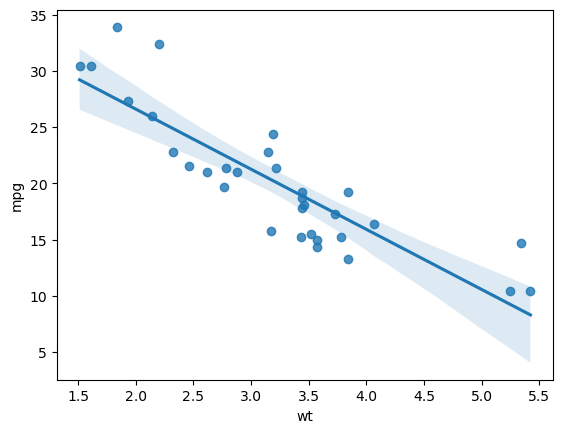

In [13]:
sns.regplot(x='wt',y='mpg',data=df);

In [14]:
y_pred = ((X * w) + b).detach().numpy()
y_pred

array([[23.10427 ],
       [21.770798],
       [24.673061],
       [19.992836],
       [18.816242],
       [18.711657],
       [18.136435],
       [20.123568],
       [20.33274 ],
       [18.816242],
       [18.816242],
       [15.521782],
       [17.299746],
       [17.03828 ],
       [ 9.351208],
       [ 8.441311],
       [ 8.854425],
       [25.300575],
       [28.359718],
       [27.20927 ],
       [23.914812],
       [18.3979  ],
       [18.84239 ],
       [16.724524],
       [16.698376],
       [26.68634 ],
       [25.614334],
       [28.893106],
       [20.228153],
       [22.319874],
       [18.136435],
       [22.267582]], dtype=float32)

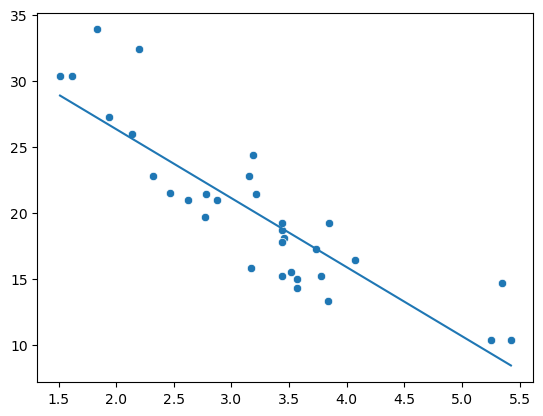

In [19]:
sns.scatterplot(x=X_list,y=y_list)
sns.lineplot(x=X_list,y=y_pred.reshape(-1));

In [20]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_np,y_list)
print(f"Slope: {reg.coef_}, Intercept: {reg.intercept_}")


Slope: [-5.3444715], Intercept: 37.285125732421875


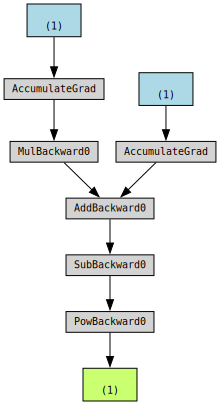

In [22]:
import os
from torchviz import make_dot
os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin' 
make_dot(loss)

In [273]:
class LinearRegressionClass(nn.Module):
    def __init__(self,input_size,output_size):
        super(LinearRegressionClass,self).__init__()
        self.linear = nn.Linear(input_size, output_size)
    
    def forward(self, x):
        out = self.linear(x)
        return out  

In [274]:
# batches in simpler term
input_dim = 1
output_dim = 1
# 
model = LinearRegressionClass(input_dim,output_dim)

In [275]:
loss_fucn = nn.MSELoss()

In [276]:
LR = 0.03
optimizer = torch.optim.SGD(model.parameters(), lr=LR)

In [277]:
losses, slope, bias = [], [], []
epoches = 10000

for epoch in range(epoches):
    # set gradients to zero
    optimizer.zero_grad()

    # forward pass 
    y_pred = model(X)

    # compute losses 
    loss = loss_fucn(y_pred,y)
    loss.backward()

    # update weight
    optimizer.step()

    # get parameters 
    for name, param in model.named_parameters():
        if param.requires_grad:
            if name == 'linear.weight':
                slope.append(param.data.numpy()[0][0]) 
            if name == 'linear.bias':
                bias.append(param.data.numpy()[0])
    # storing losses
    losses.append(float(loss.data))

    if epoch % 100 == 0:
        print('Epoch: {}, Loss: {:.4f}'.format(epoch, loss.data))


c:\Users\naman\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([32])) that is different to the input size (torch.Size([32, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0, Loss: 577.5305
Epoch: 100, Loss: 46.5899
Epoch: 200, Loss: 39.7590
Epoch: 300, Loss: 37.0208
Epoch: 400, Loss: 35.9233
Epoch: 500, Loss: 35.4833
Epoch: 600, Loss: 35.3070
Epoch: 700, Loss: 35.2363
Epoch: 800, Loss: 35.2079
Epoch: 900, Loss: 35.1966
Epoch: 1000, Loss: 35.1920
Epoch: 1100, Loss: 35.1902
Epoch: 1200, Loss: 35.1895
Epoch: 1300, Loss: 35.1892
Epoch: 1400, Loss: 35.1891
Epoch: 1500, Loss: 35.1890
Epoch: 1600, Loss: 35.1890
Epoch: 1700, Loss: 35.1890
Epoch: 1800, Loss: 35.1890
Epoch: 1900, Loss: 35.1890
Epoch: 2000, Loss: 35.1890
Epoch: 2100, Loss: 35.1890
Epoch: 2200, Loss: 35.1890
Epoch: 2300, Loss: 35.1890
Epoch: 2400, Loss: 35.1890
Epoch: 2500, Loss: 35.1890
Epoch: 2600, Loss: 35.1890
Epoch: 2700, Loss: 35.1890
Epoch: 2800, Loss: 35.1890
Epoch: 2900, Loss: 35.1890
Epoch: 3000, Loss: 35.1890
Epoch: 3100, Loss: 35.1890
Epoch: 3200, Loss: 35.1890
Epoch: 3300, Loss: 35.1890
Epoch: 3400, Loss: 35.1890
Epoch: 3500, Loss: 35.1890
Epoch: 3600, Loss: 35.1890
Epoch: 3700,

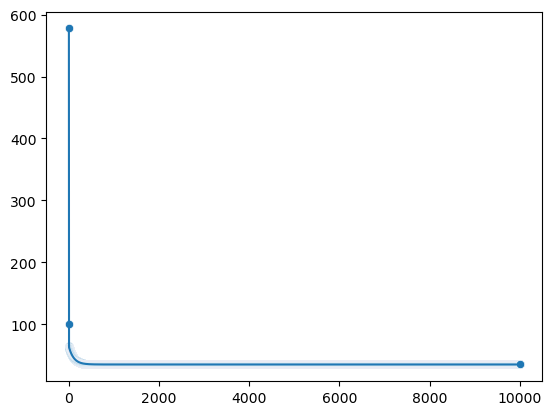

In [278]:
sns.scatterplot(x=range(epoches),y = losses)
sns.lineplot(x=range(epoches),y = losses);

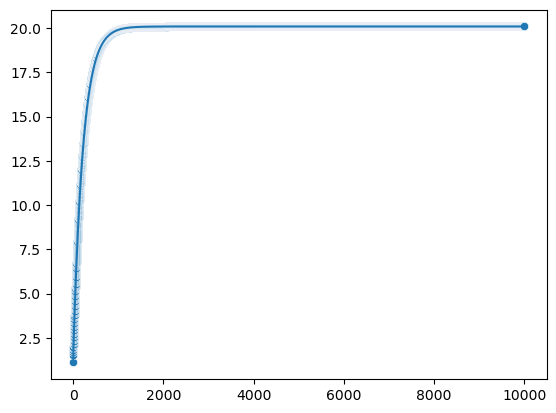

In [279]:
sns.scatterplot(x=range(epoches),y = bias)
sns.lineplot(x=range(epoches),y = bias);

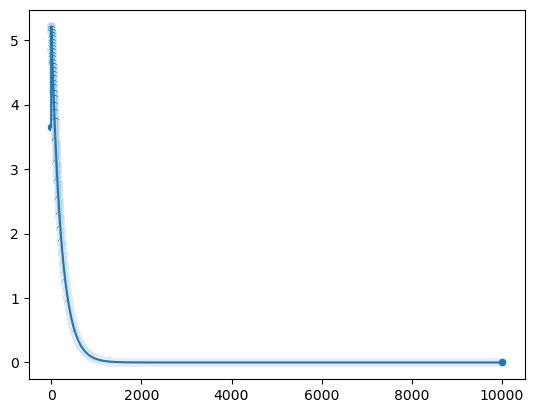

In [280]:
sns.scatterplot(x=range(epoches),y = slope)
sns.lineplot(x=range(epoches),y = slope);

In [281]:
y_pred = model(X).data.numpy().reshape(-1)

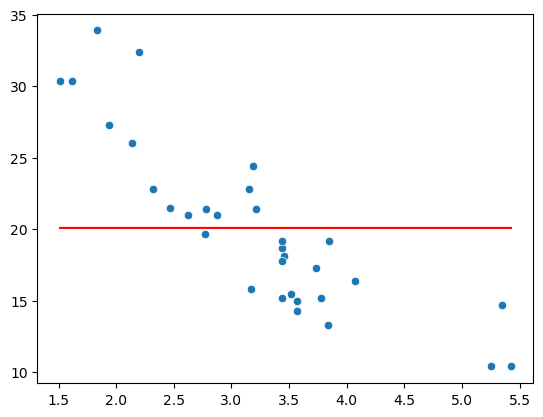

In [282]:
sns.scatterplot(x=X_list,y=y_list)
sns.lineplot(x=X_list,y=y_pred,color='red');